<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Эффективность-обогощения" data-toc-modified-id="Эффективность-обогощения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Эффективность обогощения</a></span></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Работа с пропусками</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#sMAPE" data-toc-modified-id="sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>sMAPE</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import defaultdict
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full=pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [6]:
data_train.shape

(14149, 87)

In [7]:
data_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [8]:
data_test.shape

(5290, 53)

In [9]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [11]:
data_full.shape

(19439, 87)

In [12]:
#зафиксировал псевдослучайность
rnd_state = 12345

In [13]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')

In [14]:
data_test = data_full[data_full['date'].isin(data_test['date'])]

### Эффективность обогощения

In [15]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [16]:
data_train['rougher.output.recovery_calc'] = C * (F - T) * 100 / (F * (C - T))

In [17]:
def mae(target_recovery, calculated_recovery):
    return abs(target_recovery - calculated_recovery).sum() / len(target_recovery)

target_recovery = data_train['rougher.output.recovery']
calculated_recovery = data_train['rougher.output.recovery_calc']

mae(target_recovery, calculated_recovery)

1.1131451184435918e-14

In [18]:
data_train.drop('rougher.output.recovery_calc', axis=1, inplace=True)

### Работа с пропусками

In [19]:
for data in (data_train, data_test, data_full):
    data.replace(0, np.nan, inplace=True)
    data.fillna(method='ffill', inplace=True)

In [20]:
for data in (data_train, data_test, data_full):
    print(data.isna().sum().sum())

0
0
0


От пропусков избавились и проверили

Выводы:


Рассмотрели датасеты

Зафиксировали псевдослучайность

Расчитали MAE 

Обработали пропуски

## Анализ данных

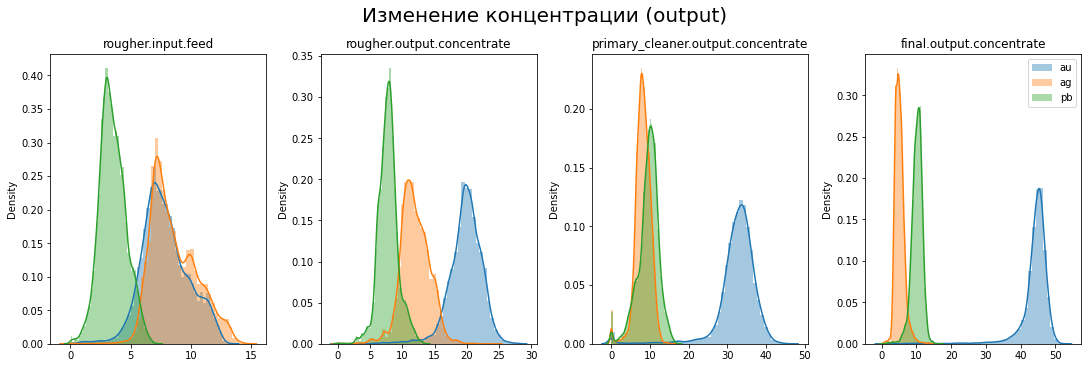

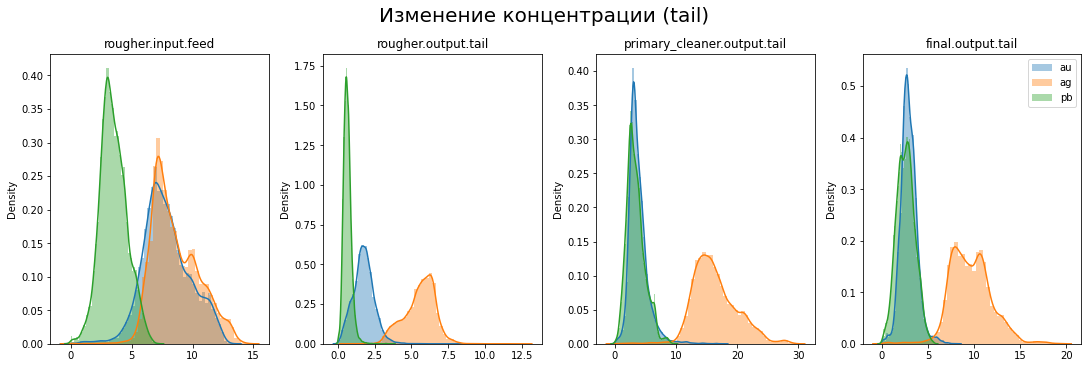

In [21]:
process = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']

process_tail = ['rougher.input.feed',
                'rougher.output.tail',
                'primary_cleaner.output.tail',
                'final.output.tail']

metals = ['au', 'ag', 'pb']

fig, axs = plt.subplots(1, len(process), figsize=(15, 5), constrained_layout=True)
fig.suptitle('Изменение концентрации (output)', fontsize=20)

for stage, ax in zip(process, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = data_train.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(data_train.loc[:, cols].dropna(), label=metal, ax=ax)    
plt.legend()

fig, axs = plt.subplots(1, 4, figsize=(15, 5), constrained_layout=True)
fig.suptitle('Изменение концентрации (tail)', fontsize=20)
for stage, ax in zip(process_tail, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = data_train.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(data_train.loc[:, cols].dropna(), label=metal, ax=ax)   
plt.legend()

plt.show()

Концентрация золотаозрастает в процессе очистки. Так же видим разную концентрацию металлов в хвосте. 

<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

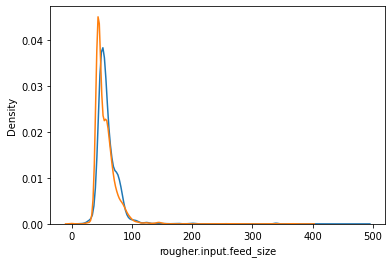

In [22]:
sns.kdeplot(data=data_train['rougher.input.feed_size'].dropna(), label='data_train')
sns.kdeplot(data=data_test['rougher.input.feed_size'].dropna(), label='data_test')

Различия размеров гранул сырья особо не выделяются. 

In [23]:
datas = (data_train, data_test)

for data in datas:
    data.loc[:, 'Суммарная концентрация всех вещевств на стадиях'] = data.loc[:, ['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol']].sum(axis=1)
    data.loc[:, 'Суммарная концентрация всех вещевств на стадиях.rougher'] = data.loc[:, ['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol']].sum(axis=1)
    data.loc[:, 'Суммарная концентрация всех вещевств на стадиях.final'] = data.loc[:, ['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol']].sum(axis=1)

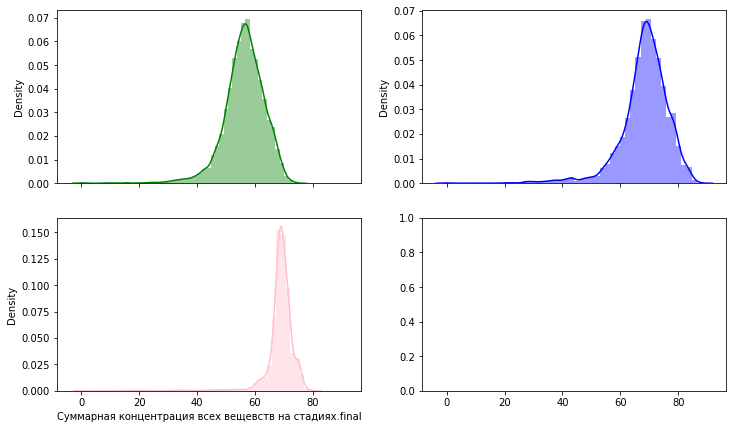

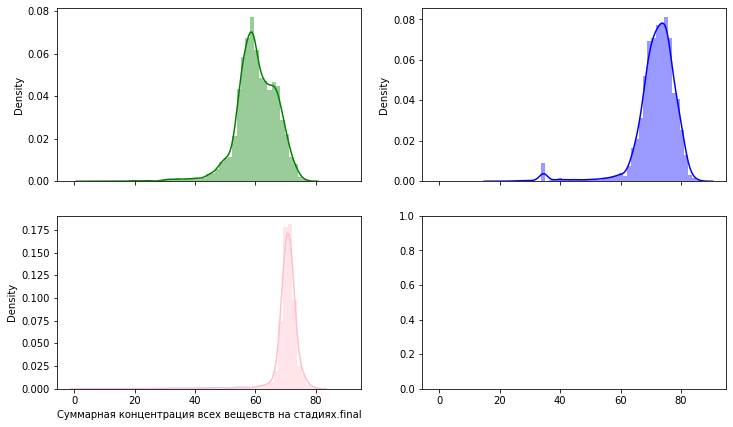

In [24]:
for data in datas:
    f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях'], color="green", ax=axes[0, 0])
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.rougher'], color="blue", ax=axes[0, 1])
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.final'], color="pink", ax=axes[1, 0]);

In [25]:
data_train = data_train[(data_train['Суммарная концентрация всех вещевств на стадиях'] > 10) &
 (data_train['Суммарная концентрация всех вещевств на стадиях.rougher'] > 20) &
 (data_train['Суммарная концентрация всех вещевств на стадиях.final'] > 10)]

data_test = data_test[(data_test['Суммарная концентрация всех вещевств на стадиях'] > 10) &
 (data_test['Суммарная концентрация всех вещевств на стадиях.rougher'] > 20) &
 (data_test['Суммарная концентрация всех вещевств на стадиях.final'] > 10)]

In [26]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

for data in (data_train, data_test):
    print(f'duplications for {namestr(data, globals())[0]}: ', data.duplicated().sum())


duplications for data_train:  0
duplications for data_test:  0


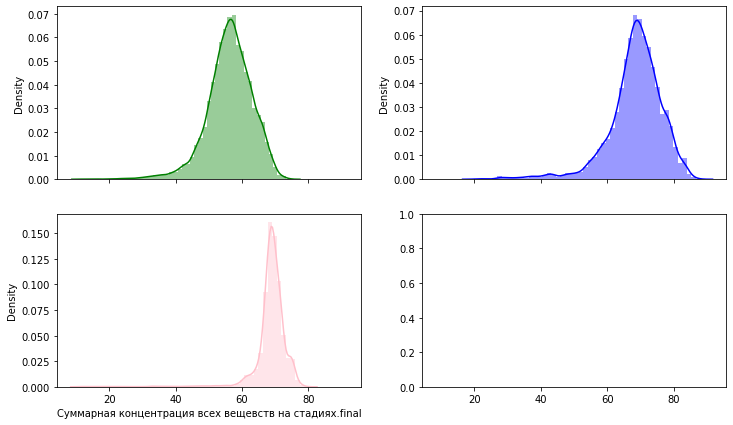

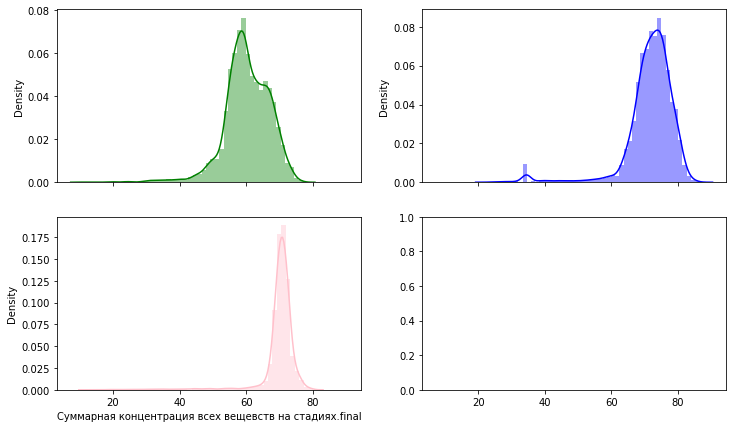

In [27]:
for data in (data_train, data_test):
    f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях'], color="green", ax=axes[0, 0])
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.rougher'], color="blue", ax=axes[0, 1])
    sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.final'], color="pink", ax=axes[1, 0]);


Выводы

В процессе очистки - концентрация золота возрастает

У металлов разная концентрация на разных этапах 

Сумма концентраций сначала уменьшается, но ближе к финальной увеличивается

## Модель

### sMAPE

In [28]:
def smape(y, y_pred, **kwargs):
    return (((abs(y - y_pred) * 2 * 100) /
              (abs(y) + abs(y_pred))).sum()) / len(y)

def end_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape.item() + 0.75 * final_smape.item()

In [29]:
data_cols_for_drop = ['final.output.concentrate_ag',
                        'final.output.concentrate_au',
                        'final.output.concentrate_pb',
                        'final.output.concentrate_sol',
                        'final.output.tail_ag',
                        'final.output.tail_au',
                        'final.output.tail_pb',
                        'final.output.tail_sol',
                        'primary_cleaner.output.concentrate_ag',
                        'primary_cleaner.output.concentrate_au',
                        'primary_cleaner.output.concentrate_pb',
                        'primary_cleaner.output.concentrate_sol',
                        'primary_cleaner.output.tail_ag',
                        'primary_cleaner.output.tail_au',
                        'primary_cleaner.output.tail_pb',
                        'primary_cleaner.output.tail_sol',
                        'rougher.calculation.au_pb_ratio',
                        'rougher.calculation.floatbank10_sulfate_to_au_feed',
                        'rougher.calculation.floatbank11_sulfate_to_au_feed',
                        'rougher.calculation.sulfate_to_au_concentrate',
                        'rougher.output.concentrate_ag',
                        'rougher.output.concentrate_au',
                        'rougher.output.concentrate_pb',
                        'rougher.output.concentrate_sol',
                        'rougher.output.tail_ag',
                        'rougher.output.tail_au',
                        'rougher.output.tail_pb',
                        'rougher.output.tail_sol',
                        'secondary_cleaner.output.tail_ag',
                        'secondary_cleaner.output.tail_au',
                        'secondary_cleaner.output.tail_pb',
                        'secondary_cleaner.output.tail_sol']


In [30]:
data_test = data_test.drop(columns=data_cols_for_drop)
data_train = data_train.drop(columns=data_cols_for_drop)

In [31]:
def feature_target_rougher(data):
    data_cols = pd.Series(data.columns)
    features_1_col = list(data_cols[data_cols.str.contains('rougher.input|rougher.state')])
    features_1 = data[features_1_col]
    
    scaler_1 = StandardScaler()
    features_1 = scaler_1.fit_transform(features_1)
    target_1 = data['rougher.output.recovery']
    
    return features_1, target_1, scaler_1

In [32]:
def feature_target_final(data):
    features_2 = data.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
    
    scaler_2 = StandardScaler()
    features_2 = scaler_2.fit_transform(features_2)
    target_2 = data['final.output.recovery']
    
    return features_2, target_2, scaler_2

In [33]:
features_1, target_1, scaler_1 = feature_target_rougher(data_train)
features_2, target_2, scaler_2 = feature_target_final(data_train)

In [34]:
def get_cv_scores(model, target, features):
    my_scorer = make_scorer(smape)
    
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring=my_scorer)
    
    return scores.mean()

### Дерево решений

In [35]:
from collections import defaultdict
d = defaultdict(list)

for depth in range(2, 14):
    
    model_1 = DecisionTreeRegressor(max_depth=depth, random_state=rnd_state)
    model_2 = DecisionTreeRegressor(max_depth=depth, random_state=rnd_state)


    rougher_smape = get_cv_scores(model_1, target_1, features_1)
    final_smape = get_cv_scores(model_2, target_2, features_2)
    d['rougher_smape'].append(rougher_smape)
    d['final_smape'].append(final_smape)
    d['end_smape'].append(end_smape(rougher_smape, final_smape))
    d['depth'].append(depth)

pd.DataFrame(d).sort_values(by='end_smape')

,rougher_smape,final_smape,end_smape,depth
1,7.005508,9.565936,8.925829,3
2,7.200816,9.839500,9.179829,4
0,7.329421,9.859806,9.227210,2
3,7.598000,10.161022,9.520267,5
4,7.572036,10.737971,9.946487,6
5,8.006873,11.127026,10.346988,7
6,8.148657,11.988728,11.028710,8
7,8.385526,12.604961,11.550102,9
8,8.111203,13.814654,12.388791,10
11,8.488357,14.878455,13.280930,13


### Случайный лес

In [36]:
from collections import defaultdict
random_forest = defaultdict(list)
for estim in range(1, 20):
    
    model_1 = RandomForestRegressor(max_depth=3, n_estimators=estim, random_state=rnd_state)
    model_2 = RandomForestRegressor(max_depth=3, n_estimators=estim, random_state=rnd_state)
    
    rougher_smape = get_cv_scores(model_1, target_1, features_1)
    final_smape = get_cv_scores(model_2, target_2, features_2)
    
    random_forest['rougher_smape'].append(rougher_smape)
    random_forest['final_smape'].append(final_smape)
    random_forest['end_smape'].append(end_smape(rougher_smape, final_smape))
    random_forest['estim'].append(estim)

pd.DataFrame(random_forest).sort_values(by='end_smape')

,rougher_smape,final_smape,end_smape,estim
18,6.898156,9.382118,8.761127,19
17,6.904216,9.391296,8.769526,18
16,6.931736,9.430245,8.805618,17
15,6.931410,9.454609,8.823809,16
13,6.951596,9.457036,8.830676,14
14,6.938245,9.462112,8.831145,15
12,6.983014,9.458621,8.839719,13
8,7.102147,9.435381,8.852073,9
11,6.996338,9.485671,8.863338,12
10,7.031280,9.487304,8.873298,11


Из данной модели наиболее лучший sMAPE при следующих параметрах: estim=18, end_smape=8.761127, final_smape = 9.382118, rougher_smape=6.898156

### Линейная регрессия

In [37]:
model_1 = LinearRegression()
model_2 = LinearRegression()

rougher_smape = get_cv_scores(model_1, target_1, features_1)
final_smape = get_cv_scores(model_2, target_2, features_2)
end_smape_ = end_smape(rougher_smape, final_smape)

data_lr_temp = pd.Series({'rougher_smape': rougher_smape,
                           'final_smape': final_smape,
                           'end_smape': end_smape_}) 
data_lr_temp

rougher_smape     6.649454
final_smape      11.053815
end_smape         9.952725
dtype: float64

### Проверка лучшей модели на тестовой выборке

Из результатов выше, наиболее лучшая модель: RandomForestRegressor(max_depth=3, n_estimators=18, random_state=12345)

In [38]:
def feature_target_rougher_test(data, scaler_1):
    data_cols = pd.Series(data_test.columns)
    features_1_col_test = list(data_cols[data_cols.str.contains('rougher.input|rougher.state')])
    features_1_test = data[features_1_col_test]
    features_1_test = scaler_1.transform(features_1_test)
    target_1_test = data['rougher.output.recovery']
    
    return features_1_test, target_1_test, scaler_1

In [39]:
def feature_target_final_test(data, scaler_2):
    features_2_test = data_test.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
    features_2_test = scaler_2.transform(features_2_test)
    target_2_test = data_test['final.output.recovery']
    
    return features_2_test, target_2_test, scaler_2

In [40]:
features_1_test, target_1_test, scaler_1 = feature_target_rougher_test(data_test, scaler_1)
features_2_test, target_2_test, scaler_2 = feature_target_final_test(data_test, scaler_2)

In [41]:
from collections import defaultdict
test_dict = defaultdict(list)

model_1 = RandomForestRegressor(max_depth=3, n_estimators=18, random_state=rnd_state)
model_2 =  RandomForestRegressor(max_depth=3, n_estimators=18, random_state=rnd_state)

model_1.fit(features_1, target_1)
model_2.fit(features_2, target_2)

train_predictions_1 = model_1.predict(features_1_test)
train_predictions_2 = model_2.predict(features_2_test)

 
test_dict['rougher_smape'].append(smape(target_1_test, train_predictions_1))
test_dict['final_smape'].append(smape(target_2_test, train_predictions_2))
test_dict['end_smape'].append(end_smape(smape(target_1_test, train_predictions_1), smape(target_2_test, train_predictions_2)))

pd.DataFrame(test_dict)

,rougher_smape,final_smape,end_smape
0,5.104553,7.983949,7.2641


Вывод

наилучшая модель: RandomForestRegressor(max_depth=3, n_estimators=18, random_state=rnd_state)
    
итоговая sMAPE равна 7.271462, этот результат лучше, чем на обучающей выборке, что говорит о том, что модель выбрана правильно.    
    

### Проверка модели на адекватность

In [43]:
from sklearn.dummy import DummyRegressor

In [44]:
features_1, target_1, scaler_1 = feature_target_rougher(data_train)
features_2, target_2, scaler_2 = feature_target_final(data_train)

model_1 = DummyRegressor(strategy="mean")
model_2 = DummyRegressor(strategy="mean")

rougher_smape = get_cv_scores(model_1, target_1, features_1)
final_smape = get_cv_scores(model_2, target_2, features_2)
end_smape_ = end_smape(rougher_smape, final_smape)

drm = pd.Series({'rougher_smape': rougher_smape,
                           'final_smape': final_smape,
                           'end_smape': end_smape_}) 
drm

rougher_smape     7.771774
final_smape      10.539761
end_smape         9.847764
dtype: float64

Вывод:

Модель, которую мы выбрали наилучшей - RandomForestRegressor(max_depth=3, n_estimators=18, random_state=rnd_state), действительно оказалась рабочей, так как качество sMAPE у нее лучше, чем у DummyRegressor.